In [1]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import SimpleRNN, Dense, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv("/Users/LaurensKrook/Documents/Universiteit van Amsterdam; Kunstmatige Intelligentie/Jaar 2/Semester 1/Leren en Beslissen/General/Data/Houses/Houses1-19/House10-1m.csv")
df.set_index('timestamp',inplace=True)
df.index=pd.to_datetime(df.index)
df = df.resample('5T').mean()
df = df.loc['2019-04-01':'2019-06-01']
df.drop(df.columns[[0,2,3,4]], axis = 1, inplace = True)
# df = df.iloc[2:]

df

,IMPORT_KW
timestamp,
2019-04-01 00:00:00+02:00,0.252
2019-04-01 00:05:00+02:00,0.228
2019-04-01 00:10:00+02:00,0.180
2019-04-01 00:15:00+02:00,0.132
2019-04-01 00:20:00+02:00,0.144
...,...
2019-06-01 23:35:00+02:00,0.564
2019-06-01 23:40:00+02:00,0.480
2019-06-01 23:45:00+02:00,0.552


**Setting train and test data**

In [197]:
import_kw = df['IMPORT_KW']
train_test_balance = len(df)//3
train = list(import_kw)[train_test_balance:]
test = list(import_kw)[:train_test_balance]

**Training**

In [198]:
windowSize, X_train, y_train = 100, [], []
for index in range(len(train)-windowSize):
    X_train.append(train[index:index+windowSize])
    y_train.append(train[index+windowSize])

In [199]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape((len(X_train), 100,1))

**Model**

In [200]:
model = Sequential()
model.add(SimpleRNN(10, input_shape=(100,1)))
model.add(Dense(1, activation='linear'))

In [201]:
model = Sequential()
model.add(SimpleRNN(64, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(16))
model.add(Dense(8, activation='tanh'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='Adam', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=3)

Epoch 1/3
369/369 [==============================] - 31s 67ms/step - loss: 0.0943 - mae: 0.1521
Epoch 2/3
369/369 [==============================] - 24s 65ms/step - loss: 0.0843 - mae: 0.1392
Epoch 3/3
369/369 [==============================] - 23s 62ms/step - loss: 0.0811 - mae: 0.1306


In [202]:
y_pred_model = model.predict(X_train)

**Train**

In [203]:
rmse_train = sqrt(mean_squared_error(y_train, y_pred_model))
print(rmse_train)

0.2957673196802893


**Test**

In [204]:
windowSize, X_test, y_test = 100, [], []
for index in range(len(test)-windowSize):
    X_test.append(test[index:index+windowSize])
    y_test.append(test[index+windowSize])

In [205]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = X_test.reshape((len(X_test), 100,1))

In [206]:
y_test_pred_model = model.predict(X_test)

In [207]:
rmse_test = sqrt(mean_squared_error(y_test, y_test_pred_model))
print(rmse_test)

0.2790642715616807


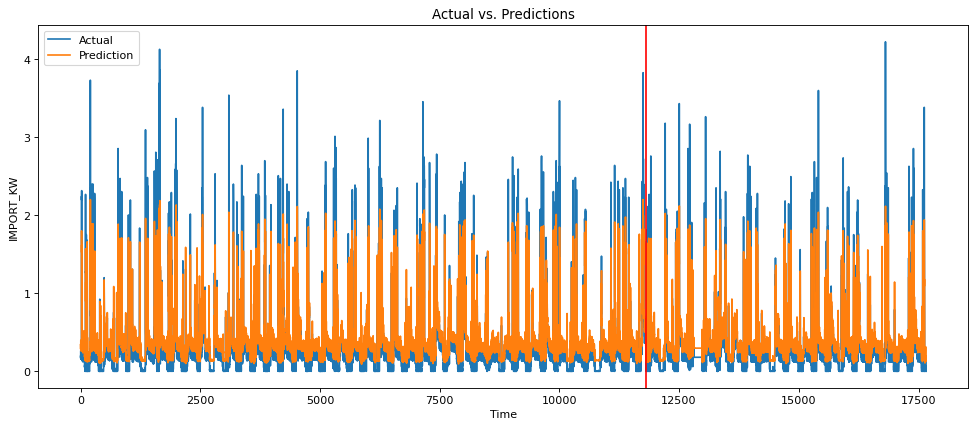

In [208]:
def plot_result(y_train, y_test, y_pred_model, y_test_pred_model):
    actual = np.append(y_train, y_test)
    predictions = np.append(y_pred_model, y_test_pred_model)
    rows = len(actual)
    plt.figure(figsize=(15,6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(y_train), color='r')
    plt.legend(['Actual', 'Prediction'])
    plt.xlabel('Time')
    plt.ylabel('IMPORT_KW')
    plt.title('Actual vs. Predictions')

plot_result(y_train, y_test, y_pred_model, y_test_pred_model)

In [209]:
print(rmse_train)
print(rmse_test)

0.2957673196802893
0.2790642715616807
